# **DS605: Fundamental of Machine Learning Project-1**  
# **Stock Price Prediction Using Regression**  

---


# Hardik Bharvada - 202418010  
# Viraj Modi - 202418060  
## Jash Virani - 202418061  
## Kashyap Shingala - 202418052

## **Problem Statement** : Predictive Modeling of Stock Prices Using Historical Data  

## **Pipeline** : Data loading -> Data preprocessing -> Split data -> Model selection -> Model training -> Model evaluation -> Model prediction

## Data Scraping

We have scrapped the data from Yahoo Finance.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
infy_df = pd.read_csv('/content/INFY.NS_original.csv')
tcs_df = pd.read_csv("/content/TCS.NS_original.csv")
wipro_df= pd.read_csv("/content/WIPRO.NS_original.csv")

# Data Analysis & Data Pre-Processing

In [77]:
# Create DataFrame for Infosys and add 30 Day Moving Average and Percentage(%) change in for that day
infy_df = infy_df.rename(columns={'Open':'Infy_Open','Close':'Infy_Close','High':'Infy_High','Low':'Infy_Low','Adj Close':'Infy_Adj Close','Volume':'Infy_Volume','30-Day MA':'Infy_30-Day MA'})
infy_df['Infy_30-Day MA'] = infy_df['Infy_Adj Close'].rolling(window=30).mean()
infy_df['Infy_%_Change'] = infy_df['Infy_Close'].pct_change()
infy_df['Infy_30-Day MA'].fillna(method='bfill',inplace=True)
infy_df

<ipython-input-77-5d008564fcee>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  infy_df['Infy_%_Change'] = infy_df['Infy_Close'].pct_change()
<ipython-input-77-5d008564fcee>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  infy_df['Infy_30-Day MA'].fillna(method='bfill',inplace=True)


,Date,Infy_Open,Infy_High,Infy_Low,Infy_Close,Infy_Adj Close,Infy_Volume,Infy_30-Day MA,Infy_%_Change
0,2004-06-01,81.274216,83.328125,81.274216,82.617966,56.663700,28710336.0,57.575469,NaN
1,2004-06-02,82.729691,83.981247,81.992966,83.398438,57.198994,17547008.0,57.575469,0.009447
2,2004-06-03,83.750000,84.140625,81.500000,81.897659,56.169678,30415040.0,57.575469,-0.017995
3,2004-06-04,81.250000,81.906250,80.500000,81.521095,55.911442,19523392.0,57.575469,-0.004598
4,2004-06-07,82.187500,83.000000,80.501564,81.365623,55.804794,21086016.0,57.575469,-0.001907
...,...,...,...,...,...,...,...,...,...
5003,2024-08-20,1880.000000,1885.699951,1868.199951,1872.199951,1872.199951,3870333.0,1787.131665,0.003968
5004,2024-08-21,1875.099976,1879.000000,1867.099976,1872.699951,1872.699951,1966902.0,1794.166663,0.000267
5005,2024-08-22,1884.000000,1893.650024,1869.699951,1880.250000,1880.250000,4300287.0,1801.603328,0.004032
5006,2024-08-23,1878.199951,1882.599976,1857.000000,1862.099976,1862.099976,5015935.0,1808.731661,-0.009653


In [78]:
infy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5008 non-null   object 
 1   Infy_Open       5001 non-null   float64
 2   Infy_High       5001 non-null   float64
 3   Infy_Low        5001 non-null   float64
 4   Infy_Close      5001 non-null   float64
 5   Infy_Adj Close  5001 non-null   float64
 6   Infy_Volume     5001 non-null   float64
 7   Infy_30-Day MA  5008 non-null   float64
 8   Infy_%_Change   5007 non-null   float64
dtypes: float64(8), object(1)
memory usage: 352.2+ KB


In [79]:
# Create DataFrame for TCS and add 30 Day Moving Average and Percentage(%) change in for that day
tcs_df = tcs_df.rename(columns={'Open':'TCS_Open','Close':'TCS_Close','High':'TCS_High','Low':'TCS_Low','Adj Close':'TCS_Adj Close','Volume':'TCS_Volume','Date':'TCS_Date','30-Day MA':'TCS_30-Day MA'})
tcs_df['TCS_30-Day MA'] = tcs_df['TCS_Adj Close'].rolling(window=30).mean()
tcs_df['TCS_%_Change'] = tcs_df['TCS_Close'].pct_change()
tcs_df['TCS_30-Day MA'].fillna(method='bfill',inplace=True)
tcs_df

<ipython-input-79-a9bb6ba134c7>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tcs_df['TCS_%_Change'] = tcs_df['TCS_Close'].pct_change()
<ipython-input-79-a9bb6ba134c7>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tcs_df['TCS_30-Day MA'].fillna(method='bfill',inplace=True)


,TCS_Date,TCS_Open,TCS_High,TCS_Low,TCS_Close,TCS_Adj Close,TCS_Volume,TCS_30-Day MA,TCS_%_Change
0,01-06-2004,82.462502,84.750000,79.387497,80.112503,56.207249,29320.0,60.053201,NaN
1,02-06-2004,82.125000,82.125000,79.775002,80.000000,56.128304,4560.0,60.053201,-0.001404
2,03-06-2004,82.000000,83.349998,78.300003,78.675003,55.198708,13808.0,60.053201,-0.016562
3,04-06-2004,81.237503,81.250000,77.250000,78.462502,55.049606,23944.0,60.053201,-0.002701
4,07-06-2004,80.000000,80.000000,78.250000,79.224998,55.584579,9608.0,60.053201,0.009718
...,...,...,...,...,...,...,...,...,...
5004,21-08-2024,4518.000000,4560.000000,4492.549805,4551.500000,4551.500000,1896990.0,4263.880908,0.006234
5005,22-08-2024,4560.000000,4560.950195,4497.200195,4502.000000,4502.000000,1829872.0,4281.405412,-0.010876
5006,23-08-2024,4500.000000,4506.000000,4455.000000,4463.899902,4463.899902,1809253.0,4300.199024,-0.008463
5007,26-08-2024,4489.000000,4552.149902,4485.000000,4502.450195,4502.450195,1844164.0,4319.793766,0.008636


In [80]:
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TCS_Date       5009 non-null   object 
 1   TCS_Open       5001 non-null   float64
 2   TCS_High       5001 non-null   float64
 3   TCS_Low        5001 non-null   float64
 4   TCS_Close      5001 non-null   float64
 5   TCS_Adj Close  5001 non-null   float64
 6   TCS_Volume     5001 non-null   float64
 7   TCS_30-Day MA  5009 non-null   float64
 8   TCS_%_Change   5008 non-null   float64
dtypes: float64(8), object(1)
memory usage: 352.3+ KB


In [81]:
# Create DataFrame for Wipro and add 30 Day Moving Average and Percentage(%) change in for that day
wipro_df = wipro_df.rename(columns={'Open':'Wipro_Open','Close':'Wipro_Close','High':'Wipro_High','Low':'Wipro_Low','Adj Close':'Wipro_Adj Close','Volume':'Wipro_Volume','Date':'Wipro_Date','30-Day MA':'Wipro_30-Day MA'})
wipro_df['Wipro_30-Day MA'] = wipro_df['Wipro_Adj Close'].rolling(window=30).mean()
wipro_df['Wipro_%_Change'] = wipro_df['Wipro_Close'].pct_change()
wipro_df['Wipro_30-Day MA'].fillna(method='bfill',inplace=True)
wipro_df

<ipython-input-81-f8e62687846a>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  wipro_df['Wipro_%_Change'] = wipro_df['Wipro_Close'].pct_change()
<ipython-input-81-f8e62687846a>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wipro_df['Wipro_30-Day MA'].fillna(method='bfill',inplace=True)


,Wipro_Date,Wipro_Open,Wipro_High,Wipro_Low,Wipro_Close,Wipro_Adj Close,Wipro_Volume,Wipro_30-Day MA,Wipro_%_Change
0,2004-06-01,57.811878,58.676250,56.930626,57.245628,47.559456,9873999.0,47.847170,NaN
1,2004-06-02,57.000004,57.693752,56.287502,57.345001,47.642014,8518239.0,47.847170,0.001736
2,2004-06-03,58.125004,58.205627,54.078751,54.740627,45.478317,12914319.0,47.847170,-0.045416
3,2004-06-04,54.941254,56.775002,54.011253,56.431877,46.883396,11777652.0,47.847170,0.030896
4,2004-06-07,59.025002,59.025002,54.943127,55.706253,46.280548,9264906.0,47.847170,-0.012858
...,...,...,...,...,...,...,...,...,...
5003,2024-08-20,519.900024,527.599976,519.650024,524.650024,524.650024,4771906.0,519.245000,0.009428
5004,2024-08-21,523.400024,528.099976,521.049988,526.349976,526.349976,3227201.0,518.749999,0.003240
5005,2024-08-22,527.799988,530.549988,518.049988,519.000000,519.000000,5748253.0,518.016666,-0.013964
5006,2024-08-23,519.900024,521.450012,511.350006,512.400024,512.400024,5638853.0,517.245000,-0.012717


In [82]:
wipro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wipro_Date       5008 non-null   object 
 1   Wipro_Open       5001 non-null   float64
 2   Wipro_High       5001 non-null   float64
 3   Wipro_Low        5001 non-null   float64
 4   Wipro_Close      5001 non-null   float64
 5   Wipro_Adj Close  5001 non-null   float64
 6   Wipro_Volume     5001 non-null   float64
 7   Wipro_30-Day MA  5008 non-null   float64
 8   Wipro_%_Change   5007 non-null   float64
dtypes: float64(8), object(1)
memory usage: 352.2+ KB


In [83]:
# Create Final DataFrame
final_df = pd.concat([infy_df,tcs_df,wipro_df],axis=1)
final_df

,Date,Infy_Open,Infy_High,Infy_Low,Infy_Close,Infy_Adj Close,Infy_Volume,Infy_30-Day MA,Infy_%_Change,TCS_Date,...,TCS_%_Change,Wipro_Date,Wipro_Open,Wipro_High,Wipro_Low,Wipro_Close,Wipro_Adj Close,Wipro_Volume,Wipro_30-Day MA,Wipro_%_Change
0,2004-06-01,81.274216,83.328125,81.274216,82.617966,56.663700,28710336.0,57.575469,NaN,01-06-2004,...,NaN,2004-06-01,57.811878,58.676250,56.930626,57.245628,47.559456,9873999.0,47.847170,NaN
1,2004-06-02,82.729691,83.981247,81.992966,83.398438,57.198994,17547008.0,57.575469,0.009447,02-06-2004,...,-0.001404,2004-06-02,57.000004,57.693752,56.287502,57.345001,47.642014,8518239.0,47.847170,0.001736
2,2004-06-03,83.750000,84.140625,81.500000,81.897659,56.169678,30415040.0,57.575469,-0.017995,03-06-2004,...,-0.016562,2004-06-03,58.125004,58.205627,54.078751,54.740627,45.478317,12914319.0,47.847170,-0.045416
3,2004-06-04,81.250000,81.906250,80.500000,81.521095,55.911442,19523392.0,57.575469,-0.004598,04-06-2004,...,-0.002701,2004-06-04,54.941254,56.775002,54.011253,56.431877,46.883396,11777652.0,47.847170,0.030896
4,2004-06-07,82.187500,83.000000,80.501564,81.365623,55.804794,21086016.0,57.575469,-0.001907,07-06-2004,...,0.009718,2004-06-07,59.025002,59.025002,54.943127,55.706253,46.280548,9264906.0,47.847170,-0.012858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,2024-08-21,1875.099976,1879.000000,1867.099976,1872.699951,1872.699951,1966902.0,1794.166663,0.000267,21-08-2024,...,0.006234,2024-08-21,523.400024,528.099976,521.049988,526.349976,526.349976,3227201.0,518.749999,0.003240
5005,2024-08-22,1884.000000,1893.650024,1869.699951,1880.250000,1880.250000,4300287.0,1801.603328,0.004032,22-08-2024,...,-0.010876,2024-08-22,527.799988,530.549988,518.049988,519.000000,519.000000,5748253.0,518.016666,-0.013964
5006,2024-08-23,1878.199951,1882.599976,1857.000000,1862.099976,1862.099976,5015935.0,1808.731661,-0.009653,23-08-2024,...,-0.008463,2024-08-23,519.900024,521.450012,511.350006,512.400024,512.400024,5638853.0,517.245000,-0.012717
5007,2024-08-26,1870.000000,1888.750000,1864.000000,1876.150024,1876.150024,3728589.0,1816.179997,0.007545,26-08-2024,...,0.008636,2024-08-26,516.000000,524.799988,515.950012,520.000000,520.000000,8675690.0,516.775001,0.014832


In [84]:
# Removing duplicate columns from Final DataFrame
final_df.drop(columns=['TCS_Date','Wipro_Date'],inplace=True)
final_df

,Date,Infy_Open,Infy_High,Infy_Low,Infy_Close,Infy_Adj Close,Infy_Volume,Infy_30-Day MA,Infy_%_Change,TCS_Open,...,TCS_30-Day MA,TCS_%_Change,Wipro_Open,Wipro_High,Wipro_Low,Wipro_Close,Wipro_Adj Close,Wipro_Volume,Wipro_30-Day MA,Wipro_%_Change
0,2004-06-01,81.274216,83.328125,81.274216,82.617966,56.663700,28710336.0,57.575469,NaN,82.462502,...,60.053201,NaN,57.811878,58.676250,56.930626,57.245628,47.559456,9873999.0,47.847170,NaN
1,2004-06-02,82.729691,83.981247,81.992966,83.398438,57.198994,17547008.0,57.575469,0.009447,82.125000,...,60.053201,-0.001404,57.000004,57.693752,56.287502,57.345001,47.642014,8518239.0,47.847170,0.001736
2,2004-06-03,83.750000,84.140625,81.500000,81.897659,56.169678,30415040.0,57.575469,-0.017995,82.000000,...,60.053201,-0.016562,58.125004,58.205627,54.078751,54.740627,45.478317,12914319.0,47.847170,-0.045416
3,2004-06-04,81.250000,81.906250,80.500000,81.521095,55.911442,19523392.0,57.575469,-0.004598,81.237503,...,60.053201,-0.002701,54.941254,56.775002,54.011253,56.431877,46.883396,11777652.0,47.847170,0.030896
4,2004-06-07,82.187500,83.000000,80.501564,81.365623,55.804794,21086016.0,57.575469,-0.001907,80.000000,...,60.053201,0.009718,59.025002,59.025002,54.943127,55.706253,46.280548,9264906.0,47.847170,-0.012858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,2024-08-21,1875.099976,1879.000000,1867.099976,1872.699951,1872.699951,1966902.0,1794.166663,0.000267,4518.000000,...,4263.880908,0.006234,523.400024,528.099976,521.049988,526.349976,526.349976,3227201.0,518.749999,0.003240
5005,2024-08-22,1884.000000,1893.650024,1869.699951,1880.250000,1880.250000,4300287.0,1801.603328,0.004032,4560.000000,...,4281.405412,-0.010876,527.799988,530.549988,518.049988,519.000000,519.000000,5748253.0,518.016666,-0.013964
5006,2024-08-23,1878.199951,1882.599976,1857.000000,1862.099976,1862.099976,5015935.0,1808.731661,-0.009653,4500.000000,...,4300.199024,-0.008463,519.900024,521.450012,511.350006,512.400024,512.400024,5638853.0,517.245000,-0.012717
5007,2024-08-26,1870.000000,1888.750000,1864.000000,1876.150024,1876.150024,3728589.0,1816.179997,0.007545,4489.000000,...,4319.793766,0.008636,516.000000,524.799988,515.950012,520.000000,520.000000,8675690.0,516.775001,0.014832


In [85]:
# List of all columns in Final DataFrame
final_df.columns.tolist()

['Date',
 'Infy_Open',
 'Infy_High',
 'Infy_Low',
 'Infy_Close',
 'Infy_Adj Close',
 'Infy_Volume',
 'Infy_30-Day MA',
 'Infy_%_Change',
 'TCS_Open',
 'TCS_High',
 'TCS_Low',
 'TCS_Close',
 'TCS_Adj Close',
 'TCS_Volume',
 'TCS_30-Day MA',
 'TCS_%_Change',
 'Wipro_Open',
 'Wipro_High',
 'Wipro_Low',
 'Wipro_Close',
 'Wipro_Adj Close',
 'Wipro_Volume',
 'Wipro_30-Day MA',
 'Wipro_%_Change']

In [86]:
# Checking Null Values
final_df.isnull().sum()

,0
Date,1
Infy_Open,8
Infy_High,8
Infy_Low,8
Infy_Close,8
Infy_Adj Close,8
Infy_Volume,8
Infy_30-Day MA,1
Infy_%_Change,2
TCS_Open,8


In [87]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5008 non-null   object 
 1   Infy_Open        5001 non-null   float64
 2   Infy_High        5001 non-null   float64
 3   Infy_Low         5001 non-null   float64
 4   Infy_Close       5001 non-null   float64
 5   Infy_Adj Close   5001 non-null   float64
 6   Infy_Volume      5001 non-null   float64
 7   Infy_30-Day MA   5008 non-null   float64
 8   Infy_%_Change    5007 non-null   float64
 9   TCS_Open         5001 non-null   float64
 10  TCS_High         5001 non-null   float64
 11  TCS_Low          5001 non-null   float64
 12  TCS_Close        5001 non-null   float64
 13  TCS_Adj Close    5001 non-null   float64
 14  TCS_Volume       5001 non-null   float64
 15  TCS_30-Day MA    5009 non-null   float64
 16  TCS_%_Change     5008 non-null   float64
 17  Wipro_Open    

In [88]:
# Creat Final DataFrame all Data Cleaning and processing
final_df.fillna(method='ffill',inplace=True)
final_df

<ipython-input-88-75e453d308d9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df.fillna(method='ffill',inplace=True)


,Date,Infy_Open,Infy_High,Infy_Low,Infy_Close,Infy_Adj Close,Infy_Volume,Infy_30-Day MA,Infy_%_Change,TCS_Open,...,TCS_30-Day MA,TCS_%_Change,Wipro_Open,Wipro_High,Wipro_Low,Wipro_Close,Wipro_Adj Close,Wipro_Volume,Wipro_30-Day MA,Wipro_%_Change
0,2004-06-01,81.274216,83.328125,81.274216,82.617966,56.663700,28710336.0,57.575469,NaN,82.462502,...,60.053201,NaN,57.811878,58.676250,56.930626,57.245628,47.559456,9873999.0,47.847170,NaN
1,2004-06-02,82.729691,83.981247,81.992966,83.398438,57.198994,17547008.0,57.575469,0.009447,82.125000,...,60.053201,-0.001404,57.000004,57.693752,56.287502,57.345001,47.642014,8518239.0,47.847170,0.001736
2,2004-06-03,83.750000,84.140625,81.500000,81.897659,56.169678,30415040.0,57.575469,-0.017995,82.000000,...,60.053201,-0.016562,58.125004,58.205627,54.078751,54.740627,45.478317,12914319.0,47.847170,-0.045416
3,2004-06-04,81.250000,81.906250,80.500000,81.521095,55.911442,19523392.0,57.575469,-0.004598,81.237503,...,60.053201,-0.002701,54.941254,56.775002,54.011253,56.431877,46.883396,11777652.0,47.847170,0.030896
4,2004-06-07,82.187500,83.000000,80.501564,81.365623,55.804794,21086016.0,57.575469,-0.001907,80.000000,...,60.053201,0.009718,59.025002,59.025002,54.943127,55.706253,46.280548,9264906.0,47.847170,-0.012858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,2024-08-21,1875.099976,1879.000000,1867.099976,1872.699951,1872.699951,1966902.0,1794.166663,0.000267,4518.000000,...,4263.880908,0.006234,523.400024,528.099976,521.049988,526.349976,526.349976,3227201.0,518.749999,0.003240
5005,2024-08-22,1884.000000,1893.650024,1869.699951,1880.250000,1880.250000,4300287.0,1801.603328,0.004032,4560.000000,...,4281.405412,-0.010876,527.799988,530.549988,518.049988,519.000000,519.000000,5748253.0,518.016666,-0.013964
5006,2024-08-23,1878.199951,1882.599976,1857.000000,1862.099976,1862.099976,5015935.0,1808.731661,-0.009653,4500.000000,...,4300.199024,-0.008463,519.900024,521.450012,511.350006,512.400024,512.400024,5638853.0,517.245000,-0.012717
5007,2024-08-26,1870.000000,1888.750000,1864.000000,1876.150024,1876.150024,3728589.0,1816.179997,0.007545,4489.000000,...,4319.793766,0.008636,516.000000,524.799988,515.950012,520.000000,520.000000,8675690.0,516.775001,0.014832


In [89]:
final_df.isnull().sum()

,0
Date,0
Infy_Open,0
Infy_High,0
Infy_Low,0
Infy_Close,0
Infy_Adj Close,0
Infy_Volume,0
Infy_30-Day MA,0
Infy_%_Change,1
TCS_Open,0


In [90]:
# Changing format of date
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [91]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5009 non-null   datetime64[ns]
 1   Infy_Open        5009 non-null   float64       
 2   Infy_High        5009 non-null   float64       
 3   Infy_Low         5009 non-null   float64       
 4   Infy_Close       5009 non-null   float64       
 5   Infy_Adj Close   5009 non-null   float64       
 6   Infy_Volume      5009 non-null   float64       
 7   Infy_30-Day MA   5009 non-null   float64       
 8   Infy_%_Change    5008 non-null   float64       
 9   TCS_Open         5009 non-null   float64       
 10  TCS_High         5009 non-null   float64       
 11  TCS_Low          5009 non-null   float64       
 12  TCS_Close        5009 non-null   float64       
 13  TCS_Adj Close    5009 non-null   float64       
 14  TCS_Volume       5009 non-null   float64

In [92]:
# Changing type of variable so save memory
final_df['Infy_Open'] = final_df['Infy_Open'].astype(np.float32)
final_df['Infy_High'] = final_df['Infy_High'].astype(np.float32)
final_df['Infy_Low'] = final_df['Infy_Low'].astype(np.float32)
final_df['Infy_Close'] = final_df['Infy_Close'].astype(np.float32)
final_df['Infy_Adj Close'] = final_df['Infy_Adj Close'].astype(np.float32)
final_df['Infy_Volume'] = final_df['Infy_Volume'].astype(np.int64)
final_df['Infy_30-Day MA'] = final_df['Infy_30-Day MA'].astype(np.float32)
final_df['Infy_%_Change'] = final_df['Infy_%_Change'].astype(np.float32)

final_df['TCS_Open'] = final_df['TCS_Open'].astype(np.float32)
final_df['TCS_High'] = final_df['TCS_High'].astype(np.float32)
final_df['TCS_Low'] = final_df['TCS_Low'].astype(np.float32)
final_df['TCS_Close'] = final_df['TCS_Close'].astype(np.float32)
final_df['TCS_Adj Close'] = final_df['TCS_Adj Close'].astype(np.float32)
final_df['TCS_%_Change'] = final_df['TCS_%_Change'].astype(np.float32)

final_df['Wipro_Open'] = final_df['Wipro_Open'].astype(np.float32)
final_df['Wipro_High'] = final_df['Wipro_High'].astype(np.float32)
final_df['Wipro_Low'] = final_df['Wipro_Low'].astype(np.float32)
final_df['Wipro_Close'] = final_df['Wipro_Close'].astype(np.float32)
final_df['Wipro_Adj Close'] = final_df['Wipro_Adj Close'].astype(np.float32)
final_df['Wipro_%_Change'] = final_df['Wipro_%_Change'].astype(np.float32)

In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5009 non-null   datetime64[ns]
 1   Infy_Open        5009 non-null   float32       
 2   Infy_High        5009 non-null   float32       
 3   Infy_Low         5009 non-null   float32       
 4   Infy_Close       5009 non-null   float32       
 5   Infy_Adj Close   5009 non-null   float32       
 6   Infy_Volume      5009 non-null   int64         
 7   Infy_30-Day MA   5009 non-null   float32       
 8   Infy_%_Change    5008 non-null   float32       
 9   TCS_Open         5009 non-null   float32       
 10  TCS_High         5009 non-null   float32       
 11  TCS_Low          5009 non-null   float32       
 12  TCS_Close        5009 non-null   float32       
 13  TCS_Adj Close    5009 non-null   float32       
 14  TCS_Volume       5009 non-null   float64

In [94]:
final_df.duplicated().sum()

0

In [95]:
# Final DataFrame
final_df

,Date,Infy_Open,Infy_High,Infy_Low,Infy_Close,Infy_Adj Close,Infy_Volume,Infy_30-Day MA,Infy_%_Change,TCS_Open,...,TCS_30-Day MA,TCS_%_Change,Wipro_Open,Wipro_High,Wipro_Low,Wipro_Close,Wipro_Adj Close,Wipro_Volume,Wipro_30-Day MA,Wipro_%_Change
0,2004-06-01,81.274216,83.328125,81.274216,82.617966,56.663700,28710336,57.575470,NaN,82.462502,...,60.053201,NaN,57.811878,58.676250,56.930626,57.245628,47.559456,9873999.0,47.847170,NaN
1,2004-06-02,82.729691,83.981247,81.992966,83.398438,57.198994,17547008,57.575470,0.009447,82.125000,...,60.053201,-0.001404,57.000004,57.693752,56.287502,57.345001,47.642014,8518239.0,47.847170,0.001736
2,2004-06-03,83.750000,84.140625,81.500000,81.897659,56.169678,30415040,57.575470,-0.017995,82.000000,...,60.053201,-0.016562,58.125004,58.205627,54.078751,54.740627,45.478317,12914319.0,47.847170,-0.045416
3,2004-06-04,81.250000,81.906250,80.500000,81.521095,55.911442,19523392,57.575470,-0.004598,81.237503,...,60.053201,-0.002701,54.941254,56.775002,54.011253,56.431877,46.883396,11777652.0,47.847170,0.030896
4,2004-06-07,82.187500,83.000000,80.501564,81.365623,55.804794,21086016,57.575470,-0.001907,80.000000,...,60.053201,0.009718,59.025002,59.025002,54.943127,55.706253,46.280548,9264906.0,47.847170,-0.012858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,2024-08-21,1875.099976,1879.000000,1867.099976,1872.699951,1872.699951,1966902,1794.166626,0.000267,4518.000000,...,4263.880908,0.006234,523.400024,528.099976,521.049988,526.349976,526.349976,3227201.0,518.749999,0.003240
5005,2024-08-22,1884.000000,1893.650024,1869.699951,1880.250000,1880.250000,4300287,1801.603271,0.004032,4560.000000,...,4281.405412,-0.010876,527.799988,530.549988,518.049988,519.000000,519.000000,5748253.0,518.016666,-0.013964
5006,2024-08-23,1878.199951,1882.599976,1857.000000,1862.099976,1862.099976,5015935,1808.731689,-0.009653,4500.000000,...,4300.199024,-0.008463,519.900024,521.450012,511.350006,512.400024,512.400024,5638853.0,517.245000,-0.012717
5007,2024-08-26,1870.000000,1888.750000,1864.000000,1876.150024,1876.150024,3728589,1816.180054,0.007545,4489.000000,...,4319.793766,0.008636,516.000000,524.799988,515.950012,520.000000,520.000000,8675690.0,516.775001,0.014832


In [96]:
final_df.to_csv('final_df.csv')
from google.colab import files
files.download('final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Understanding the data through effective graph visualization


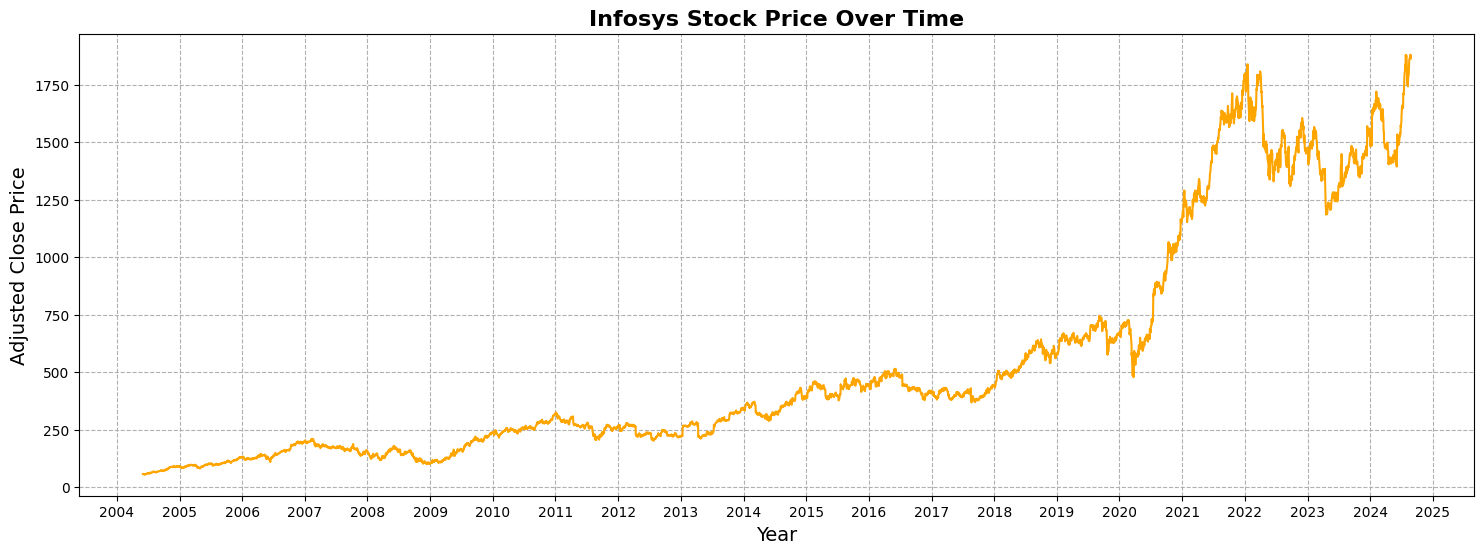

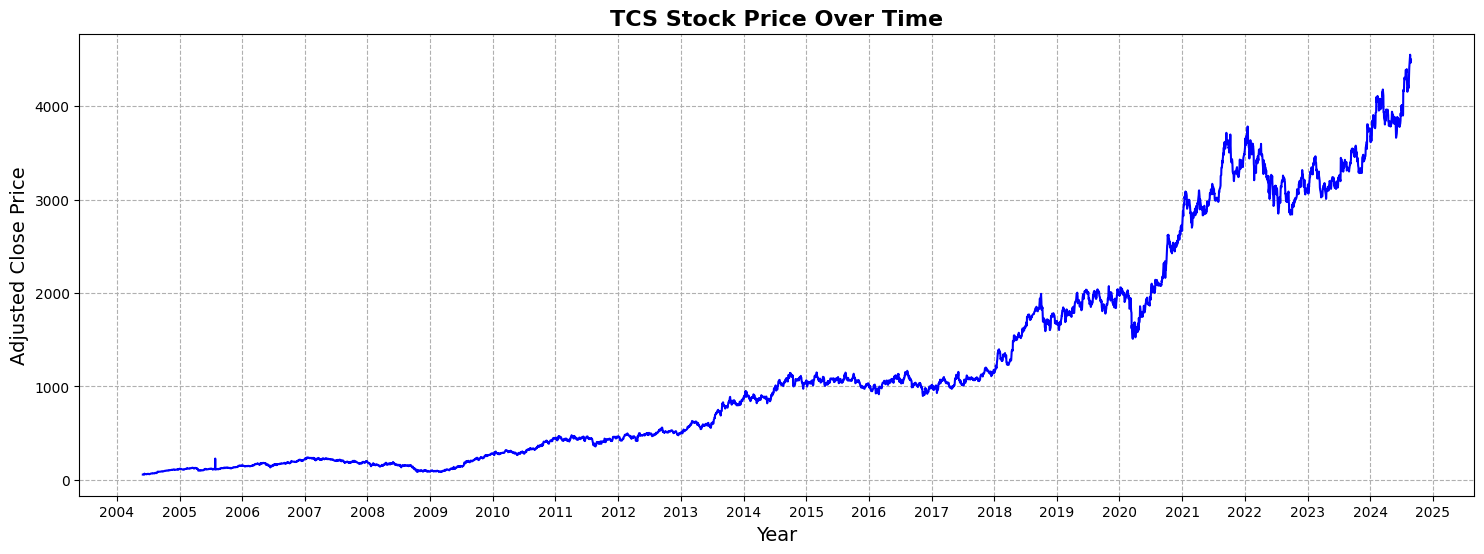

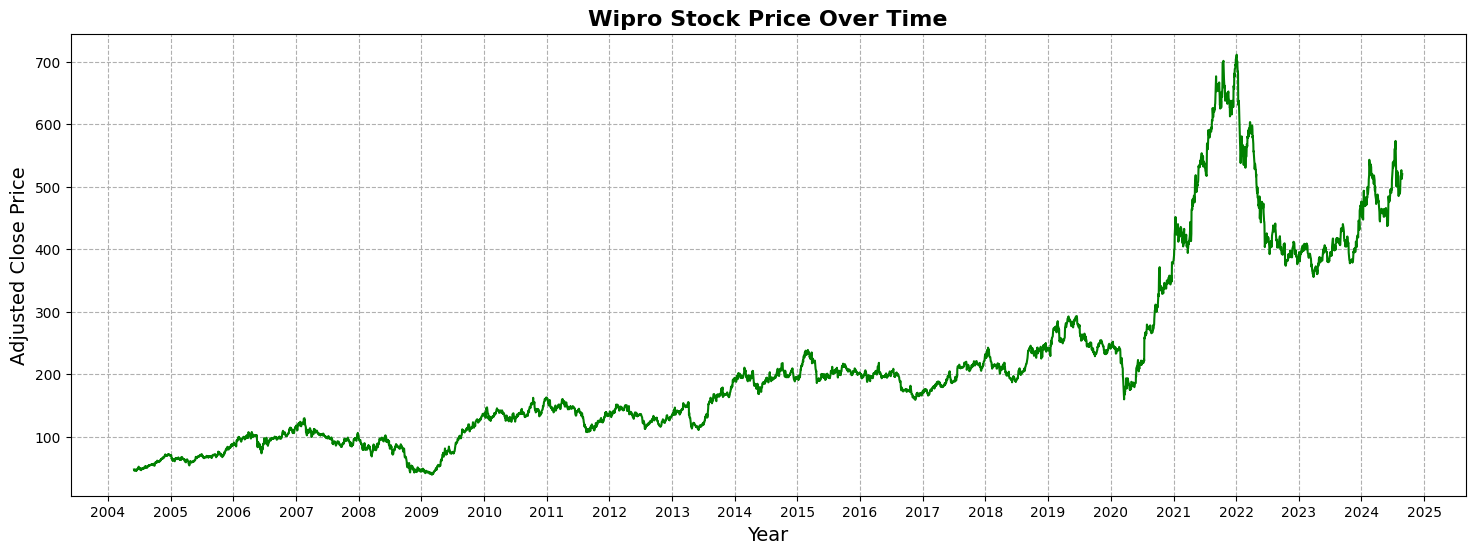

In [98]:
# Graph of Adjusted Closing Price of all 3 companies
import matplotlib.dates as mdates
close_prices = [['Infy_Adj Close','orange','Infosys'],['TCS_Adj Close','blue','TCS'],['Wipro_Adj Close','green','Wipro']]
for i,j,k in close_prices:
  plt.figure(figsize=(18, 6))
  plt.plot(final_df['Date'],final_df[i],color=j)

  plt.title(f'{k} Stock Price Over Time', fontsize=16, fontweight='bold')
  plt.xlabel('Year', fontsize=14)
  plt.ylabel('Adjusted Close Price', fontsize=14)

  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

  plt.grid(True, which='both', linestyle='--')

### INSIGHTS
1. Relative Performance: Compare how each stock's price has changed relative to the others. This can reveal which stock has performed better over the long term.  
2. Volatility: Assess the volatility of each stock by looking at the fluctuations in their prices. A stock with more frequent and larger fluctuations may be more volatile.  
3. Impact of Major Events Analysis: Correlate significant changes in the stock prices with major historical events (e.g., the 2008 Lehman Brothers financial crisis, COVID-19). This can help understand how these events impacted each stock differently.
4. Stock Specific Analysis:

*   TCS have shown a steady upward trend with fewer dips, that shows strong and consistent performance.
*   Infosys have experienced more volatility, with significant spikes and drops but overall trend is upwards.
*   Wipro have had periods of stagnation beacuse of gaining and losing value, and has shown most voliaility.



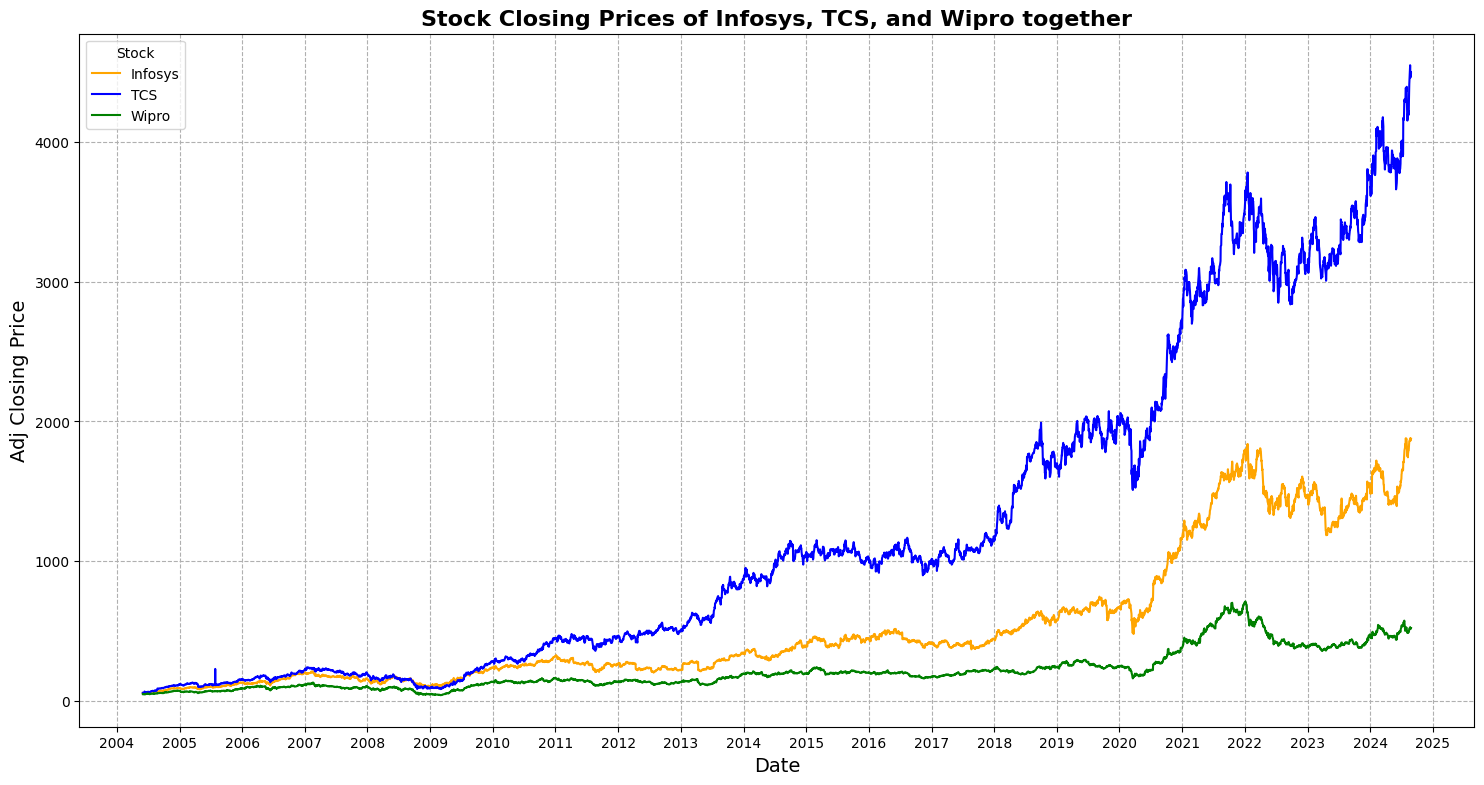

In [99]:
# Graph of Adjusted Closing Price of all 3 companies together
stocks = [
    ('Infy_Adj Close', 'orange', 'Infosys'),
    ('TCS_Adj Close', 'blue', 'TCS'),
    ('Wipro_Adj Close', 'green', 'Wipro')
]

plt.figure(figsize=(18,9))

for i, j, k in stocks:
    plt.plot(final_df['Date'], final_df[i], color=j, label=k)

plt.title('Stock Closing Prices of Infosys, TCS, and Wipro together', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Closing Price', fontsize=14)
plt.legend(title='Stock')
plt.grid(True, which='both', linestyle='--')

# Set x-axis major locator to year and format the labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()


### INSIGHTS
 Here we can obverse that though starting from almost the price in June 2004 stock price of TCS has has grown extensively in comparision to Infosys and Wipro, though Infosys outperformed Wipro but still has lagged far behind TCS in terms of stock price.

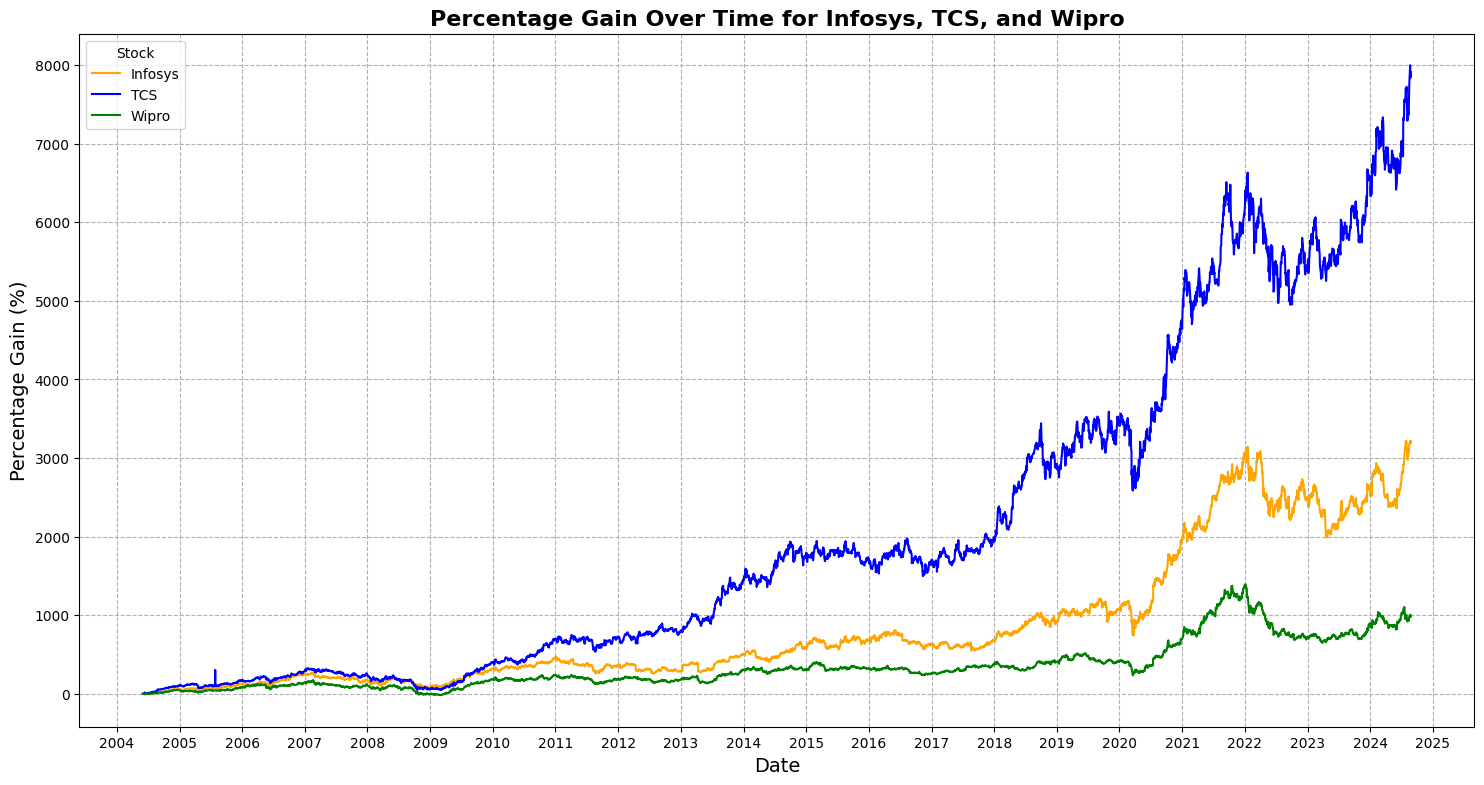

In [100]:
# Graph of Cumulative percenatge gain of all 3 companies together over the years
stocks_gains = [
    ('Infy_Adj Close', 'orange', 'Infosys'),
    ('TCS_Adj Close', 'blue', 'TCS'),
    ('Wipro_Adj Close', 'green', 'Wipro')
]

plt.figure(figsize=(18, 9))

for i, j, k in stocks_gains:

    initial_price = final_df[i].iloc[0]
    percentage_change = ((final_df[i] - initial_price) / initial_price) * 100
    plt.plot(final_df['Date'], percentage_change, color=j, label=k)

plt.title('Percentage Gain Over Time for Infosys, TCS, and Wipro', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Gain (%)', fontsize=14)
plt.legend(title='Stock')
plt.grid(True, which='both', linestyle='--')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()


### INSIGHTS
It can be seen that TCS have given roughly 8000% gains(i.e. stock price has increaded 79 times from it's value in 2004) to someone who would have bought the stock in June 2004 while Infosys have given more than 3000%(29 times) and Wipro appreciating the least with 1000%(9 times) appreciation.

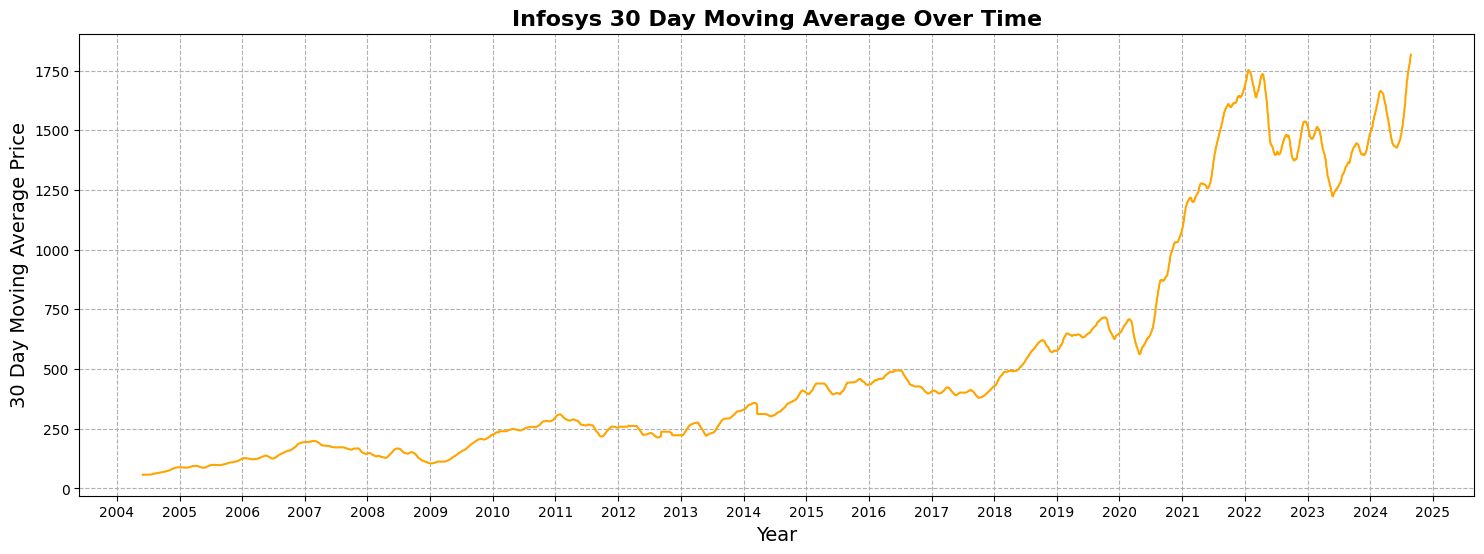

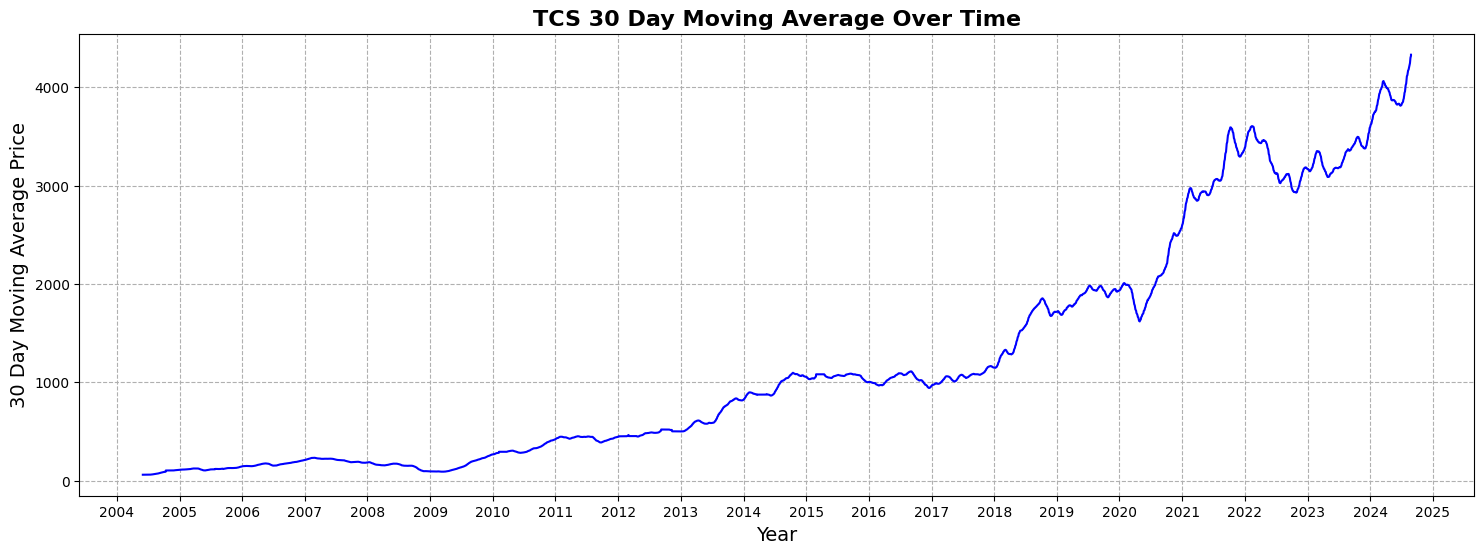

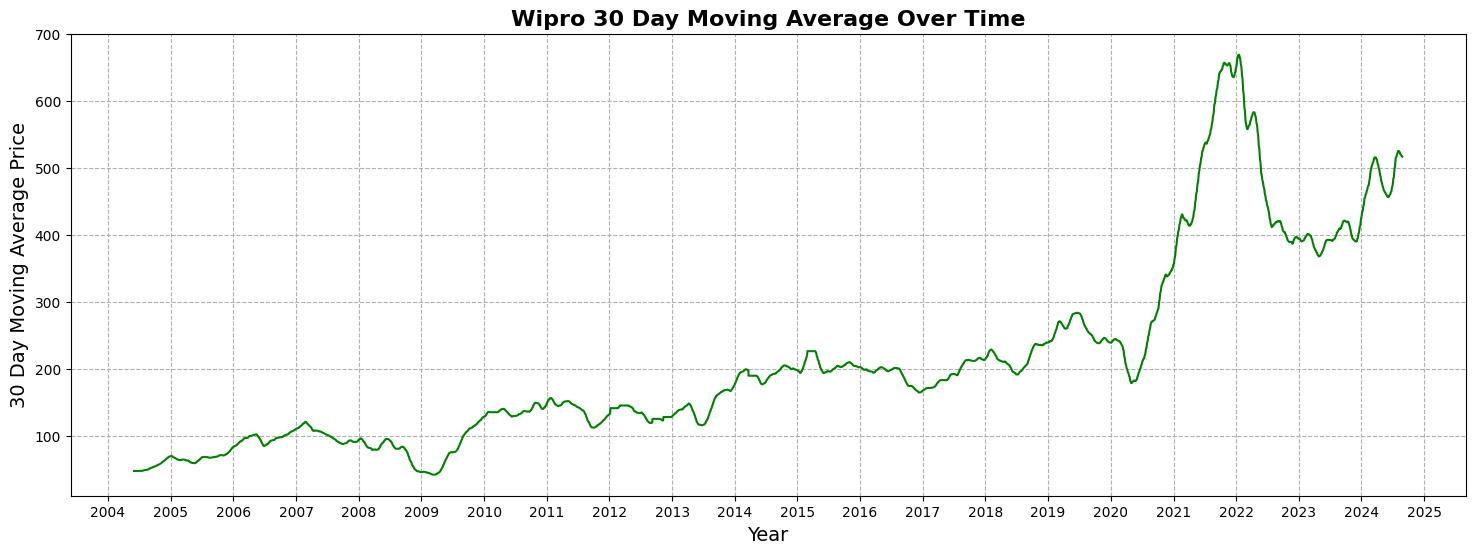

In [101]:
# Graph of 30 Day Moving Average of all 3 companies
close_prices = [['Infy_30-Day MA','orange','Infosys'],['TCS_30-Day MA','blue','TCS'],['Wipro_30-Day MA','green','Wipro']]
for i,j,k in close_prices:
  plt.figure(figsize=(18, 6))
  plt.plot(final_df['Date'],final_df[i],color=j)

  plt.title(f'{k} 30 Day Moving Average Over Time', fontsize=16, fontweight='bold')
  plt.xlabel('Year', fontsize=14)
  plt.ylabel('30 Day Moving Average Price', fontsize=14)

  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

  plt.grid(True, which='both', linestyle='--')

### INSIGHTS
The 30-day moving average smooths out short-term fluctuations and noise, providing a clearer view of the overall trend. This makes it easier to identify whether the stock is in an uptrend, downtrend, or moving sideways. When the stock price is above the 30-day MA, it typically indicates a bullish (upward) trend. Conversely, when the price is below the 30-day MA, it suggests a bearish (downward) trend.
  
This can be a good indicator for thw value of stock as it is seen from the graph that 30 Day MA value is almost similar to the original price of stock i.e. both have similar graphs

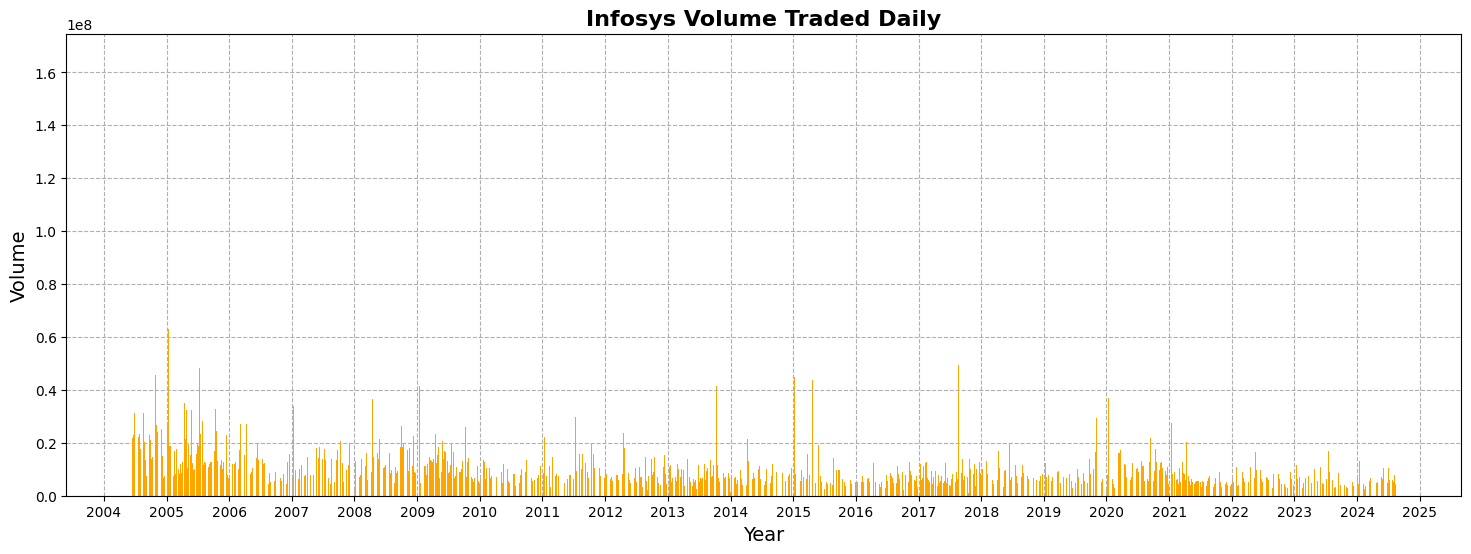

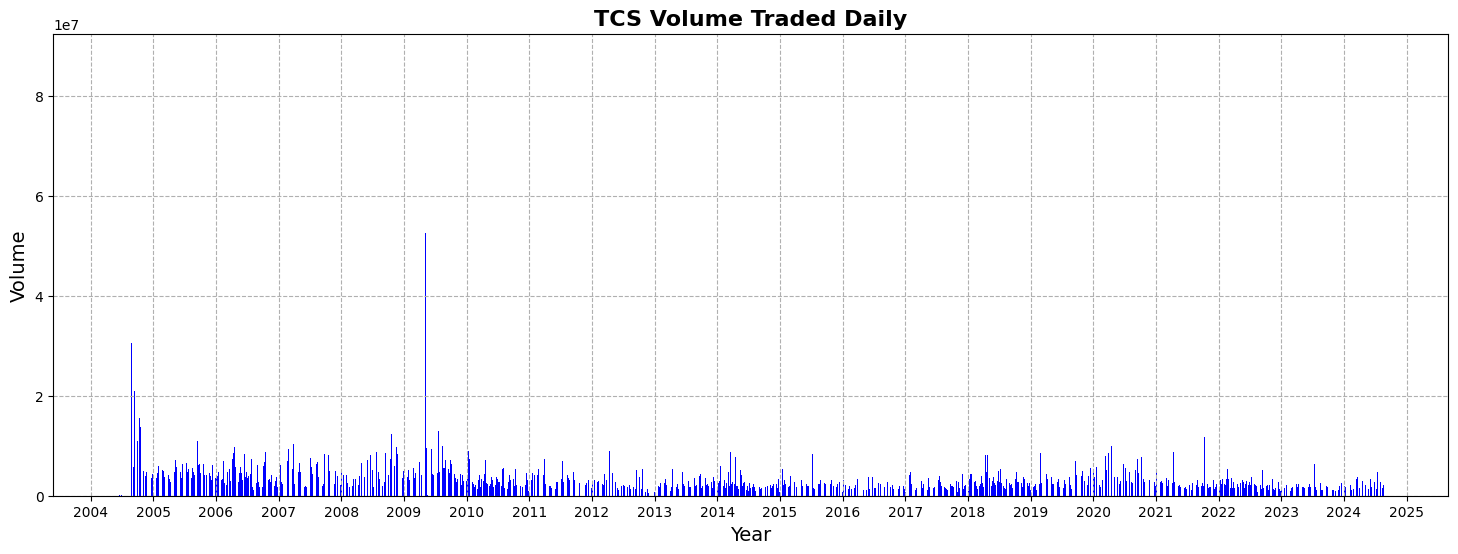

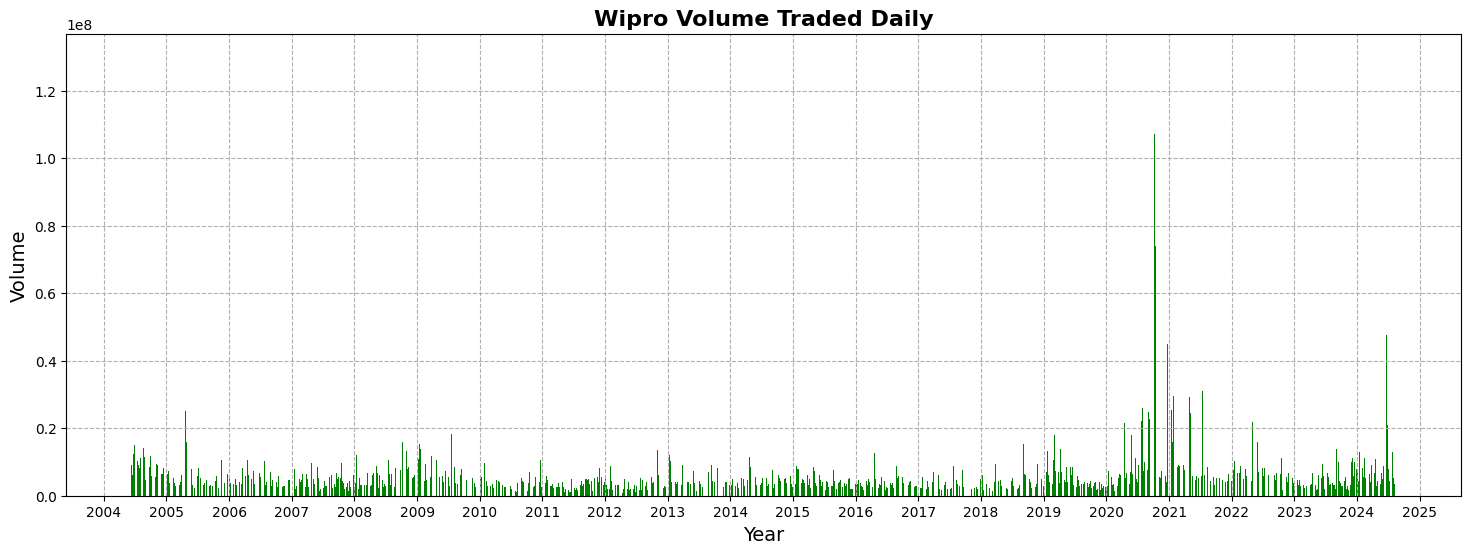

In [102]:
# Graph of Volume traded of all 3 companies over the years
close_prices = [['Infy_Volume','orange','Infosys'],['TCS_Volume','blue','TCS'],['Wipro_Volume','green','Wipro']]
for i,j,k in close_prices:
  plt.figure(figsize=(18, 6))
  plt.bar(final_df['Date'],final_df[i],color=j)

  plt.title(f'{k} Volume Traded Daily', fontsize=16, fontweight='bold')
  plt.xlabel('Year', fontsize=14)
  plt.ylabel('Volume', fontsize=14)

  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

  plt.grid(True, which='both', linestyle='--')

### INSIGHTS
A high trading volume indicates that a stock is actively traded. This often suggests strong investor interest and can be a sign of confidence in the stock. High volume is typically seen during major news events, earnings reports, or other significant announcements.  
  
Volume is a direct measure of liquidity, which refers to how easily a stock can be bought or sold without affecting its price. Stocks with higher volume are generally more liquid, meaning they can be traded more easily and with less price fluctuation.
  
It can be seen from the graphs that Daily volume traded of all 3 companies lie in almost same range, with rare peaks that may occure due to some announcement or some Macro-economic fator.

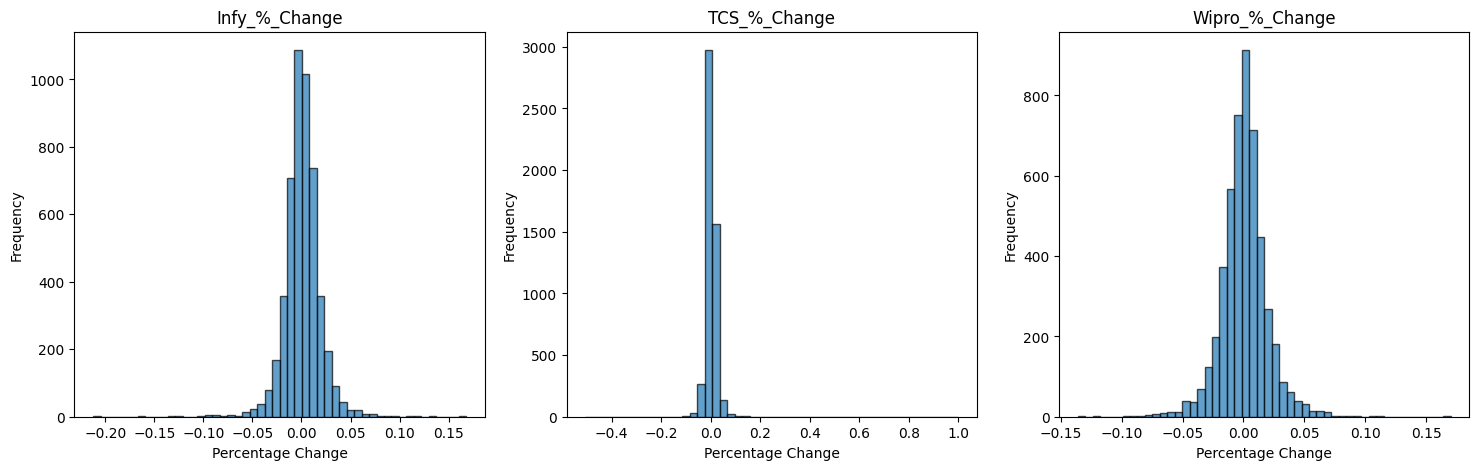

In [103]:
# Histogram of Daily Percentage(%) Change of all 3 companies
Change = ['Infy_%_Change','TCS_%_Change','Wipro_%_Change']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, ax in enumerate(axes):
    ax.hist(final_df[Change[i]], bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(Change[i])

    ax.set_xlabel('Percentage Change')
    ax.set_ylabel('Frequency')

plt.show()

### INSIGHT
The histogram shows whether the daily percentage changes are symmetrically distributed around a central value (here 0). A symmetric distribution with a peak around 0% suggests that most daily changes are small, with equal chances of gains and losses. Also it can be seen that there is almost no Skewness and low Kurtosis(thin tail).  
  
It can be seen that % Change of Infosys,TCS and Wipro is almost symmetric.

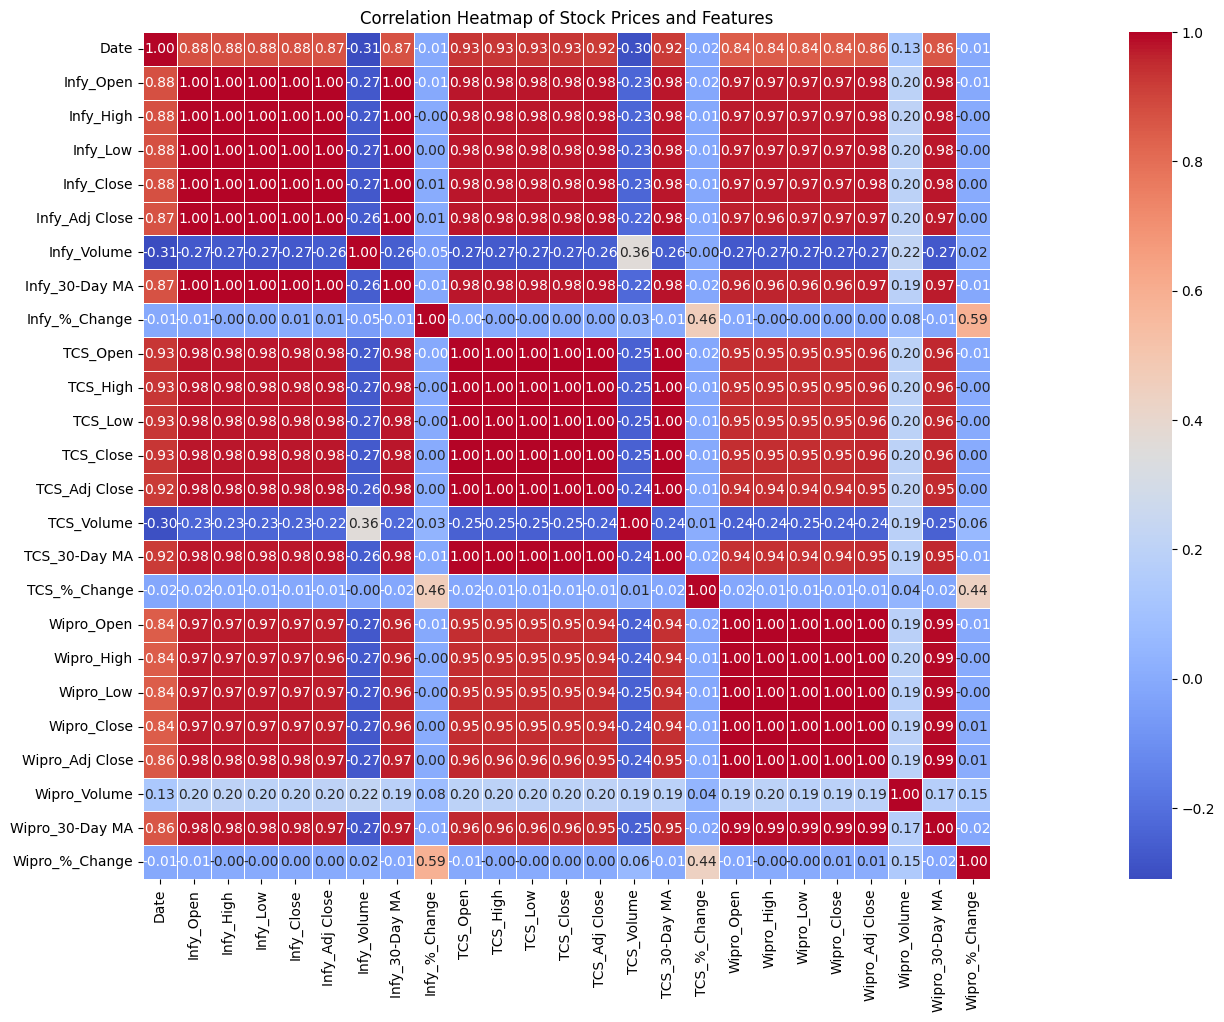

In [104]:
# Calculating correlation matrix
correlation_matrix = final_df.corr()

plt.figure(figsize=(36,11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

plt.title('Correlation Heatmap of Stock Prices and Features')

plt.show()

# Data Split & Model Training

---



# Ridge Model

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import os

# Load the data
path = r"/content/final_df.csv"
df = pd.read_csv(path)
source_path = os.path.basename(path)

# Convert the Date column to datetime format and sort the data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values('Date')

# Define features and target
features = ['TCS_Open', 'TCS_High', 'TCS_Low',"TCS_Volume","TCS_30-Day MA","TCS_%_Change","TCS_Adj Close"]
df['Prediction'] = df['TCS_Close'].shift(-1)
df = df.dropna()

X = df[features]
y = df['Prediction']

# Split the data into training+validation and test sets without shuffling
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

best_model = None
best_mse = float('inf')

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
evs_scores = []

fold_number = 1

for train_index, val_index in tscv.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Train the model
    model = Ridge(alpha=2.0)
    model.fit(X_train, y_train)

    # Validate the model
    val_predictions = model.predict(X_val)

    # Calculate metrics for the validation set
    mse = mean_squared_error(y_val, val_predictions)
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, val_predictions)
    evs = explained_variance_score(y_val, val_predictions)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    evs_scores.append(evs)

    # Check if this model is the best one so far
    if mse < best_mse:
        best_mse = mse
        best_model = model


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58446e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Evaluation Metrics on test data: 

Mean Squared Error on Test Set: 2518.6363055226147
Root Mean Squared Error on Test Set: 50.18601703186471
Mean Absolute Error on Test Set: 37.52613285154003
R-squared on Test Set: 0.9855700078097946
Explained Variance Score on Test Set: 0.9861814660187811


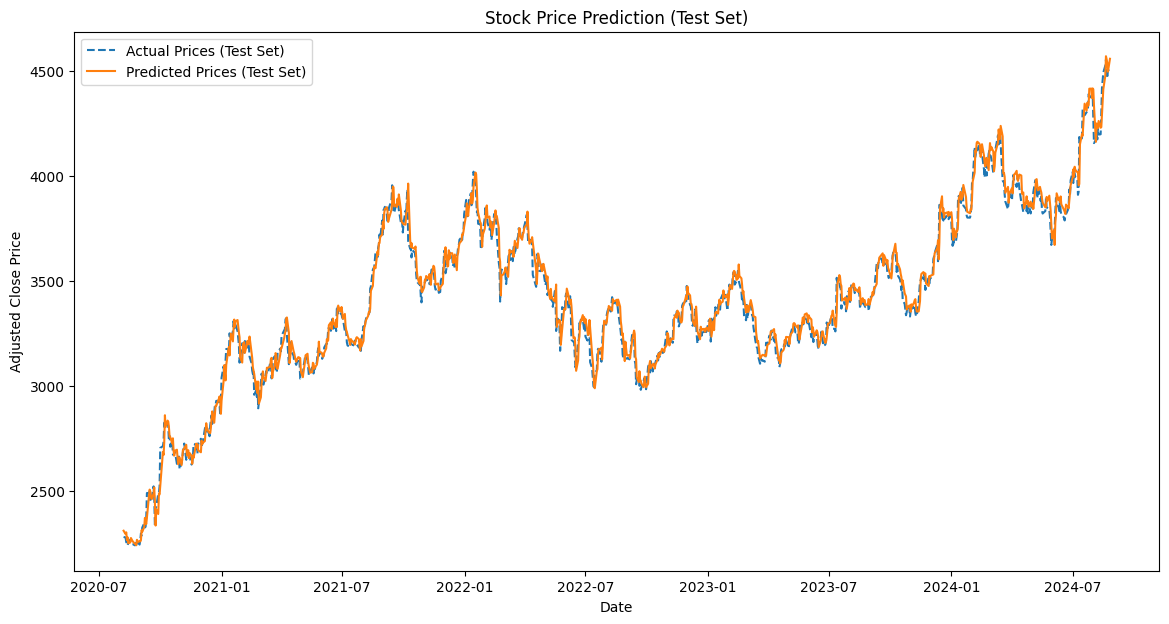

Evaluation Metrics on validation set: 

Average Mean Squared Error on Validation Folds: 507.70885909447645
Average Root Mean Squared Error on Validation Folds: 20.973475381641506
Average Mean Absolute Error on Validation Folds: 16.059171931202123
Average R-squared on Validation Folds: 0.9577215069968779
Average Explained Variance Score on Validation Folds: 0.9741256805268668


In [107]:
# Train the best model on the full training+validation data as said by Arpit Sir during Lecture
if best_model:
    best_model.fit(X_train_val, y_train_val)
    test_predictions = best_model.predict(X_test)

    # Calculate metrics for the test set
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)
    test_evs = explained_variance_score(y_test, test_predictions)

    # Print test metrics
    print("Evaluation Metrics on test data: \n")
    print(f'Mean Squared Error on Test Set: {test_mse}')
    print(f'Root Mean Squared Error on Test Set: {test_rmse}')
    print(f'Mean Absolute Error on Test Set: {test_mae}')
    print(f'R-squared on Test Set: {test_r2}')
    print(f'Explained Variance Score on Test Set: {test_evs}')

    plt.figure(figsize=(14,7))
    plt.plot(df['Date'].iloc[-len(X_test):], y_test, label='Actual Prices (Test Set)', linestyle='--')
    plt.plot(df['Date'].iloc[-len(X_test):], test_predictions, label='Predicted Prices (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('Stock Price Prediction (Test Set)')
    plt.legend()
    plt.show()

    # Calculate and print the average MSE across all validation folds
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_rmse = np.mean(rmse_scores)
    average_r2 = np.mean(r2_scores)
    average_evs = np.mean(evs_scores)

    print("Evaluation Metrics on validation set: \n")
    print(f'Average Mean Squared Error on Validation Folds: {average_mse}')
    print(f'Average Root Mean Squared Error on Validation Folds: {average_rmse}')
    print(f'Average Mean Absolute Error on Validation Folds: {average_mae}')
    print(f'Average R-squared on Validation Folds: {average_r2}')
    print(f'Average Explained Variance Score on Validation Folds: {average_evs}')

    joblib.dump(best_model, f'model_{os.path.splitext(source_path)[0]}.pkl')
else:
    print("No model was trained.")

In [108]:
loaded_model = joblib.load(f'model_{os.path.splitext(source_path)[0]}.pkl')

# Use the loaded model to make predictions
latest_data_point = X.iloc[-1].values.reshape(1, -1)
next_day_prediction = loaded_model.predict(latest_data_point)
print(f'Predicted price for the next day: {next_day_prediction[0]}')

Predicted price for the next day: 4555.94975427933


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# Lasso Model

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import os

# Load the data
path = r"/content/final_df.csv"
df = pd.read_csv(path)
source_path = os.path.basename(path)

# Convert the Date column to datetime format and sort the data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values('Date')

# Define features and target
features = ['TCS_Open', 'TCS_High', 'TCS_Low',"TCS_Volume","TCS_30-Day MA","TCS_%_Change","TCS_Adj Close"]
df['Prediction'] = df['TCS_Close'].shift(-1)
df = df.dropna()

X = df[features]
y = df['Prediction']

# Split the data into training+validation and test sets without shuffling
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

best_model = None
best_mse = float('inf')

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
evs_scores = []

plt.figure(figsize=(14,7))

fold_number = 1

for train_index, val_index in tscv.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Train the model
    model = Lasso(alpha=1.0)
    model.fit(X_train, y_train)

    # Validate the model
    val_predictions = model.predict(X_val)

    # Calculate metrics for the validation set
    mse = mean_squared_error(y_val, val_predictions)
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, val_predictions)
    evs = explained_variance_score(y_val, val_predictions)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    evs_scores.append(evs)

    # Check if this model is the best one so far
    if mse < best_mse:
        best_mse = mse
        best_model = model


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.751e+04, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.580e+04, tolerance: 5.075e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.217e+04, tolerance: 4.895e

<Figure size 1400x700 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.245e+05, tolerance: 1.628e+05
  model = cd_fast.enet_coordinate_descent(


Evaluation Metrics on test data: 

Mean Squared Error on Test Set: 3311.0714009402
Root Mean Squared Error on Test Set: 57.5419099521401
Mean Absolute Error on Test Set: 43.72110670577425
R-squared on Test Set: 0.9810299191066153
Explained Variance Score on Test Set: 0.9821365760870054


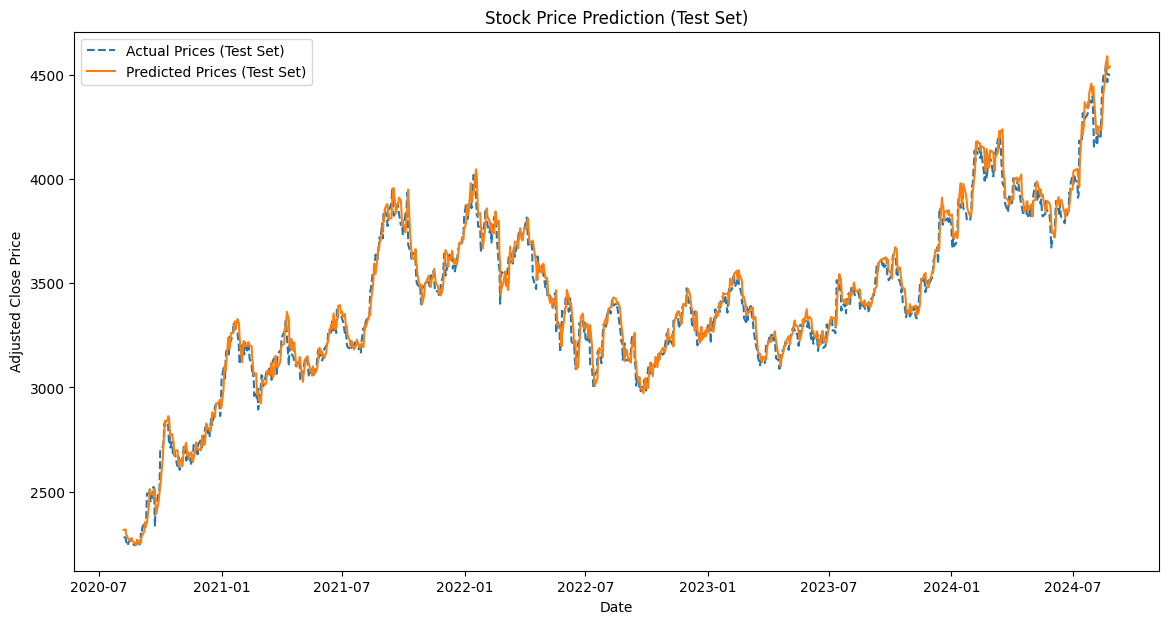

Evaluation Metrics on validation set: 

Average Mean Squared Error on Validation Folds: 593.0885303938752
Average Root Mean Squared Error on Validation Folds: 21.808924680569977
Average Mean Absolute Error on Validation Folds: 16.602090929294132
Average R-squared on Validation Folds: 0.9577846246478708
Average Explained Variance Score on Validation Folds: 0.9694654227271314


In [111]:
# Train the best model on the full training+validation data
if best_model:
    best_model.fit(X_train_val, y_train_val)
    test_predictions = best_model.predict(X_test)

    # Calculate metrics for the test set
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)
    test_evs = explained_variance_score(y_test, test_predictions)

    # Print test metrics
    print("Evaluation Metrics on test data: \n")
    print(f'Mean Squared Error on Test Set: {test_mse}')
    print(f'Root Mean Squared Error on Test Set: {test_rmse}')
    print(f'Mean Absolute Error on Test Set: {test_mae}')
    print(f'R-squared on Test Set: {test_r2}')
    print(f'Explained Variance Score on Test Set: {test_evs}')

    plt.figure(figsize=(14,7))
    plt.plot(df['Date'].iloc[-len(X_test):], y_test, label='Actual Prices (Test Set)', linestyle='--')
    plt.plot(df['Date'].iloc[-len(X_test):], test_predictions, label='Predicted Prices (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('Stock Price Prediction (Test Set)')
    plt.legend()
    plt.show()

    # Calculate and print the average MSE across all validation folds
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_rmse = np.mean(rmse_scores)
    average_r2 = np.mean(r2_scores)
    average_evs = np.mean(evs_scores)

    print("Evaluation Metrics on validation set: \n")
    print(f'Average Mean Squared Error on Validation Folds: {average_mse}')
    print(f'Average Root Mean Squared Error on Validation Folds: {average_rmse}')
    print(f'Average Mean Absolute Error on Validation Folds: {average_mae}')
    print(f'Average R-squared on Validation Folds: {average_r2}')
    print(f'Average Explained Variance Score on Validation Folds: {average_evs}')

    joblib.dump(best_model, f'model_{os.path.splitext(source_path)[0]}.pkl')
else:
    print("No model was trained.")


# Linear Regression Model

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import os

# Load the data
path = r"/content/final_df.csv"
df = pd.read_csv(path)
source_path = os.path.basename(path)

# Convert the Date column to datetime format and sort the data
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values('Date')

# Define features and target
features = ['TCS_Open', 'TCS_High', 'TCS_Low',"TCS_Volume","TCS_30-Day MA","TCS_%_Change","TCS_Adj Close"]
df['Prediction'] = df['TCS_Close'].shift(-1)
df = df.dropna()

X = df[features]
y = df['Prediction']

# Split the data into training+validation and test sets without shuffling
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

best_model = None
best_mse = float('inf')

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
evs_scores = []

plt.figure(figsize=(14,7))

fold_number = 1

for train_index, val_index in tscv.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Validate the model
    val_predictions = model.predict(X_val)

    # Calculate metrics for the validation set
    mse = mean_squared_error(y_val, val_predictions)
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, val_predictions)
    evs = explained_variance_score(y_val, val_predictions)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    evs_scores.append(evs)

    # Check if this model is the best one so far
    if mse < best_mse:
        best_mse = mse
        best_model = model


<Figure size 1400x700 with 0 Axes>

Evaluation Metrics on test data: 

Mean Squared Error on Test Set: 2518.9557154265153
Root Mean Squared Error on Test Set: 50.18919919092668
Mean Absolute Error on Test Set: 37.52961893142258
R-squared on Test Set: 0.9855681778185376
Explained Variance Score on Test Set: 0.9861809952032373


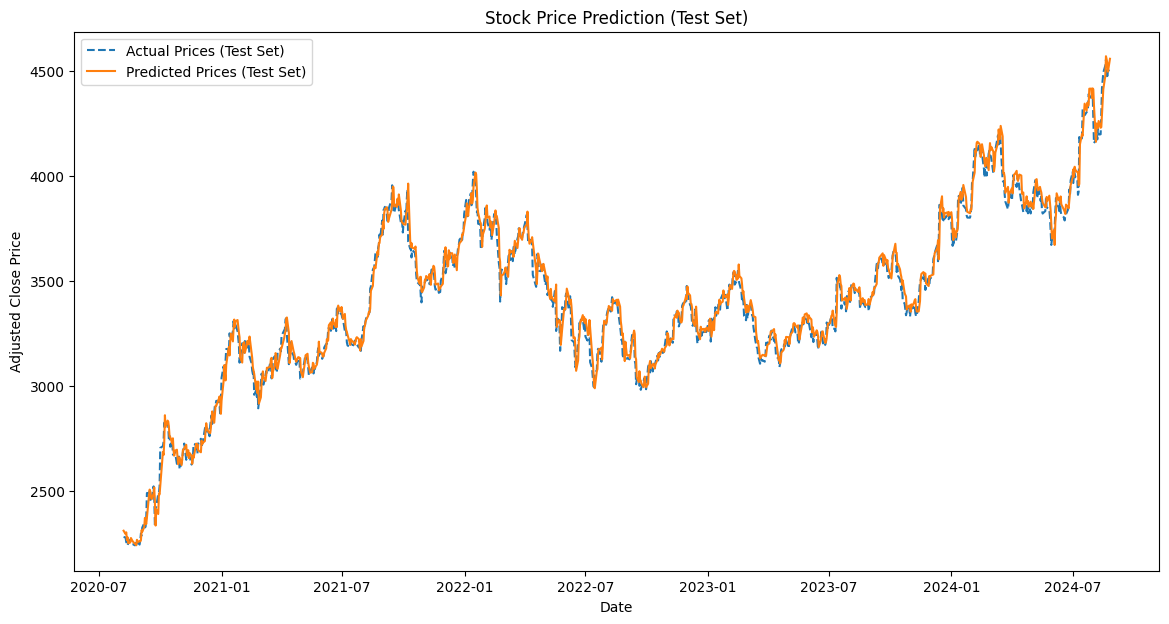

Evaluation Metrics on validation set: 

Average Mean Squared Error on Validation Folds: 519.3202702974991
Average Root Mean Squared Error on Validation Folds: 21.320606983050293
Average Mean Absolute Error on Validation Folds: 16.35767928044026
Average R-squared on Validation Folds: 0.9559557874011648
Average Explained Variance Score on Validation Folds: 0.9734969513418112


In [113]:
# Train the best model on the full training+validation data
if best_model:
    best_model.fit(X_train_val, y_train_val)
    test_predictions = best_model.predict(X_test)

    # Calculate metrics for the test set
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)
    test_evs = explained_variance_score(y_test, test_predictions)

    # Print test metrics
    print("Evaluation Metrics on test data: \n")
    print(f'Mean Squared Error on Test Set: {test_mse}')
    print(f'Root Mean Squared Error on Test Set: {test_rmse}')
    print(f'Mean Absolute Error on Test Set: {test_mae}')
    print(f'R-squared on Test Set: {test_r2}')
    print(f'Explained Variance Score on Test Set: {test_evs}')

    plt.figure(figsize=(14,7))
    plt.plot(df['Date'].iloc[-len(X_test):], y_test, label='Actual Prices (Test Set)', linestyle='--')
    plt.plot(df['Date'].iloc[-len(X_test):], test_predictions, label='Predicted Prices (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('Stock Price Prediction (Test Set)')
    plt.legend()
    plt.show()

    # Calculate and print the average MSE across all validation folds
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_rmse = np.mean(rmse_scores)
    average_r2 = np.mean(r2_scores)
    average_evs = np.mean(evs_scores)

    print("Evaluation Metrics on validation set: \n")
    print(f'Average Mean Squared Error on Validation Folds: {average_mse}')
    print(f'Average Root Mean Squared Error on Validation Folds: {average_rmse}')
    print(f'Average Mean Absolute Error on Validation Folds: {average_mae}')
    print(f'Average R-squared on Validation Folds: {average_r2}')
    print(f'Average Explained Variance Score on Validation Folds: {average_evs}')

    joblib.dump(best_model, f'model_{os.path.splitext(source_path)[0]}.pkl')
else:
    print("No model was trained.")


# Documentation  
  
### Data Preparation and Processing

**Loading Data:**

1. Read stock data from CSV files scrapped from [Yahoo Finance](https://finance.yahoo.com/) into separate DataFrames for Infosys, TCS, and Wipro.


**Feature Engineering:**

1. Infosys:
 - Calculate the 30-day moving average and daily percentage change for closing prices.
 - Rename columns to distinguish them.

2. TCS and Wipro:
 - Similar processing as Infosys with column renaming.

**Data Merging:**

1. Combine DataFrames for Infosys, TCS, and Wipro into a single DataFrame.
2. Remove duplicate columns and handle missing values using forward-fill.
3. Convert the 'Date' column to datetime format and adjust data types for memory efficiency.

**Visualization:**

**1. Adjusted Close Prices:**
 - Plot time series for each company and combine them.

**2. Cumulative Percentage Gain:**
 - Plot percentage gain for each company over time.

**3. 30-Day Moving Average:**
 - Plot moving averages for all three companies.

**4. Volume Traded:**
 - Bar charts showing daily trading volume.

**5. Daily Percentage Change:**
 - Histograms for percentage changes.

**6. Correlation Heatmap:**
 - Show correlations between features.

### Model Training

**Data Preparation for Modeling:**

1. Load the cleaned data and sort by date.
2. Define features and target variable; shift the 'TCS_Close' for prediction.
3. Split data into training validation and test sets.

**Model Training and Validation:**

1. Use TimeSeriesSplit for cross-validation.
2. Train and validate models using Ridge, Lasso, and Linear Regression.
3. Select the best model based on Mean Squared Error (MSE).

**Model Evaluation:**

1. Evaluate the best model on the test set using MSE, Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared, and Explained Variance Score.
2. Plot actual vs. predicted prices on the test set.

**Model Persistence:**

Save the best-performing model using joblib for future use.
This documentation covers data processing, visualization, and model training steps, providing a comprehensive overview of the analysis and predictive modeling workflow.